<a href="https://colab.research.google.com/github/maryandy2002/maryandy2002/blob/main/Polinomio_de_Hermite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polinomio de Hermite
---
---
El método de Polinomio de Hermite, funciona como el método de Diferencias Divididas de Newton, con la diferencia en que podemos ocupar el método de Hermite cuando además de conocer los puntos $(x_0,f(x_0)),(x_1,f(x_1)),...,(x_n,f(x_n))$ también conocemos los valores de la función evaluada en esos puntos, es decir $f'(x_0),f'(x_1),...f'(x_n)$. Esto nos sirve para obtener un polinomio de interpolación mucho más preciso, ya que, no solo coincidirá con los puntos dados, sino, que también lo hará con el valor de la derivada de la función en estos puntos.



Para realizar esto primero duplicamos cada punto $x_i$ y, al igual que en diferencias divididas de Newton, el primer orden estará dado por:

*   $f[x_i]=f(x_i)$

Pero ahora para las diferencias divididas de  orden 2 debemos considerar la siguente condicion:

*   $f[x_i,x_{i+1}]=f'(x_i)$ en el caso en que $x_i=x_{i+1}$ lo cual, ocurrira por haber duplicado los puntos
*   $f[x_i,x_{i+1}]=\frac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_i}$, para cuando $x_i\neq x_{i+1}$, tal cual el método de diferencias divididas de Newton

A partir de estos dos casos para las diferencias divididas de orden 1 y 2, el resto del método es el mismo que en Diferencias Divididas de Newton





A continuación, podemos observar lo siguiente:

* Un código que lleva a cabo el método de polinomio de Hermite
* Una tabla con los resultados del cálculo de cada una de las diferencias divididas
* La gráfica del polinomio de Hermite, mostrando que efectivamente pasa por los puntos indicados
* El polinomio de interpolación obtenido

In [23]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from  tabulate import tabulate

def hermite(x_i,f_i,fp_i):
  x=sp.symbols('x')
  n=2*len(x_i)
  x_vals=[]
  #matriz de ceros
  Q = [[0 for _ in range(n)] for _ in range(n)]
  P = [1 for _ in range(n)]
  PP=0

  #Duplicar cada punto
  for i in range(n):
    if i%2==0:
      Q[i][0]=f_i[i//2]
      x_vals.append(x_i[i//2])
    else:
      Q[i][0]=f_i[i//2]
      x_vals.append(x_i[i//2])

  #Llenar prmieras diferencias divididas con la condicion de los valores de la función derivada
  for i in range(1,n):
    if i%2==1:
      Q[i][1]=fp_i[i//2]
    else:
      Q[i][1]=(Q[i][0]-Q[i-1][0])/(x_vals[i]-x_vals[i-1])

  for j in range(2,n):
    for i in range(j,n):
      Q[i][j]=(Q[i][j-1]-Q[i-1][j-1])/(x_vals[i]-x_vals[i-j])

  headers = ["f[x]", "f[x,x]", "f[x,x,x]", "f[x,x,x,x]","f[x,x,x,x,x]","f[x,x,x,x,x,x]"]
  print(tabulate(Q, headers=headers, tablefmt='grid'))

  for j in range(0,n):
    for i in range(j):
      P[j]=P[j]*(x-x_vals[i])
    PP=PP+Q[j][j]*P[j]

  # Función evaluable
  f_eval = sp.lambdify(x, PP, 'numpy')

  # Gráfica
  xx = np.linspace(min(x_i), max(x_i), 1000)
  yf = f_eval(xx)
  plt.plot(xx, yf, label='Polinomio de Hermite')
  plt.scatter(x_i, f_i, color='red', label='Puntos')
  plt.title('Interpolación por método de Polinomio de Hermite')
  plt.grid(True)
  plt.legend()
  plt.show()

  return PP

+----------+-----------+-------------+--------------+----------------+------------------+
|     f[x] |    f[x,x] |    f[x,x,x] |   f[x,x,x,x] |   f[x,x,x,x,x] |   f[x,x,x,x,x,x] |
+==========+===========+=============+==============+================+==================+
| 0.620086 |  0        |  0          |    0         |     0          |       0          |
+----------+-----------+-------------+--------------+----------------+------------------+
| 0.620086 | -0.522023 |  0          |    0         |     0          |       0          |
+----------+-----------+-------------+--------------+----------------+------------------+
| 0.455402 | -0.548946 | -0.0897427  |    0         |     0          |       0          |
+----------+-----------+-------------+--------------+----------------+------------------+
| 0.455402 | -0.569896 | -0.069833   |    0.0663656 |     0          |       0          |
+----------+-----------+-------------+--------------+----------------+------------------+
| 0.281819

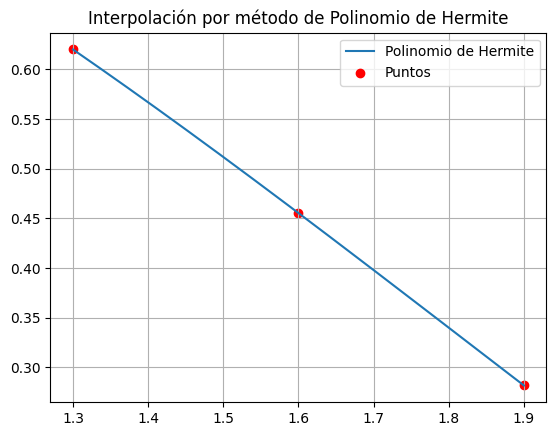

-0.00277469135798944*x**5 + 0.0240317901231809*x**4 - 0.0145560802460553*x**3 - 0.235216169754413*x**2 - 0.00822922345577151*x + 1.00194406469105

In [24]:
x_i=[1.3,1.6,1.9]
f_i=[0.6200860,0.4554022,0.2818186]
fp_i=[-0.5220232,-0.5698959,-0.5811571]
PP=hermite(x_i,f_i,fp_i)
sp.expand(PP)